In [25]:
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
results_list = []

for patient_num in ['09', '17', '37', '54', '66', '74', '98']:
    for i in range(1, 11):

        with open(f"../val_results/results_{patient_num}_epoch_{5*i}.txt", 'r') as fi:
            results = fi.readlines()
            
        sensitivity = results[5].strip().split()[1]
        if sensitivity == 'Undefined':
            sensitivity = None
        else: sensitivity = float(sensitivity)
            
        false_positives = int(results[3].strip().split()[2])

        results_list.append((patient_num, 5*i, sensitivity, false_positives))

In [20]:
results_df = pd.DataFrame(results_list, 
             columns=['study_num', 'epochs', 'sensitivity', 'false_positives']
            )

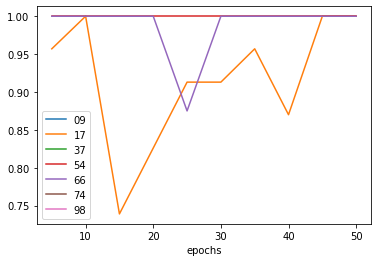

In [23]:
fig, ax = plt.subplots()

for study in results_df['study_num'].unique():
    results_df[results_df['study_num'] == study].plot(x="epochs", y = "sensitivity", label=study, ax=ax)

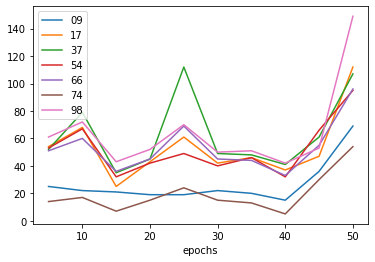

In [24]:
fig, ax = plt.subplots()

for study in results_df['study_num'].unique():
    results_df[results_df['study_num'] == study].plot(x="epochs", y = "false_positives", label=study, ax=ax)